In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# გაფრთხილებების გამორთვა
import warnings
warnings.filterwarnings('ignore')

# მონაცემების ჩატვირთვა
data = pd.read_csv('netflix daily top 10.csv')

# მონაცემების გასუფთავება და მომზადება
data['Netflix Release Date'] = pd.to_datetime(data['Netflix Release Date'])
data['Days Since Release'] = (pd.to_datetime('2020-04-10') - data['Netflix Release Date']).dt.days

# '-' სიმბოლოების შეცვლა NaN-ით და შემდეგ NaN მნიშვნელობების მოშორება
data = data.replace('-', np.nan)
data = data.dropna()

# ციფრულ ტიპებად გარდაქმნა
data['Days Since Release'] = pd.to_numeric(data['Days Since Release'])
data['Viewership Score'] = pd.to_numeric(data['Viewership Score'])


# 1. ერთცვლადიანი წრფივი რეგრესია

ერთცვლადიანი წრფივი რეგრესიის შედეგები:
MSE: 11762.241544532793
R-squared: 0.027589658665530314


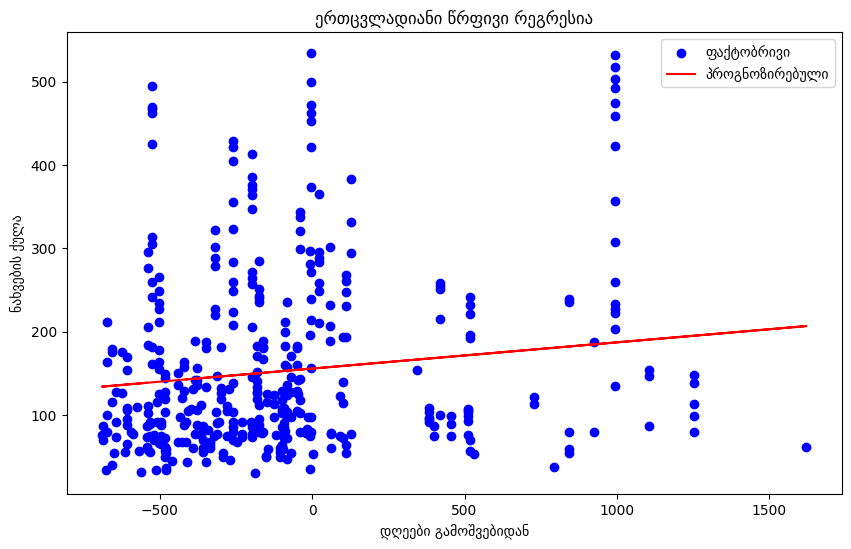

ახალი მონაცემის პროგნოზი (100 დღე გამოშვებიდან): 158.69482265813429


In [30]:
X = data[['Days Since Release']]
y = data['Viewership Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("ერთცვლადიანი წრფივი რეგრესიის შედეგები:")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

# ვიზუალიზაცია
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='ფაქტობრივი')
plt.plot(X_test, y_pred, color='red', label='პროგნოზირებული')
plt.xlabel('დღეები გამოშვებიდან')
plt.ylabel('ნახვების ქულა')
plt.title('ერთცვლადიანი წრფივი რეგრესია')
plt.legend()
plt.show()

# ახალი მონაცემის პროგნოზი
new_data = pd.DataFrame({'Days Since Release': [100]})
new_prediction = model.predict(new_data)
print(f"ახალი მონაცემის პროგნოზი (100 დღე გამოშვებიდან): {new_prediction[0]}")

# 2. მრავალცვლადიანი წრფივი რეგრესია


მრავალცვლადიანი წრფივი რეგრესიის შედეგები:
MSE: 590.83952451999
R-squared: 0.9511539988753733


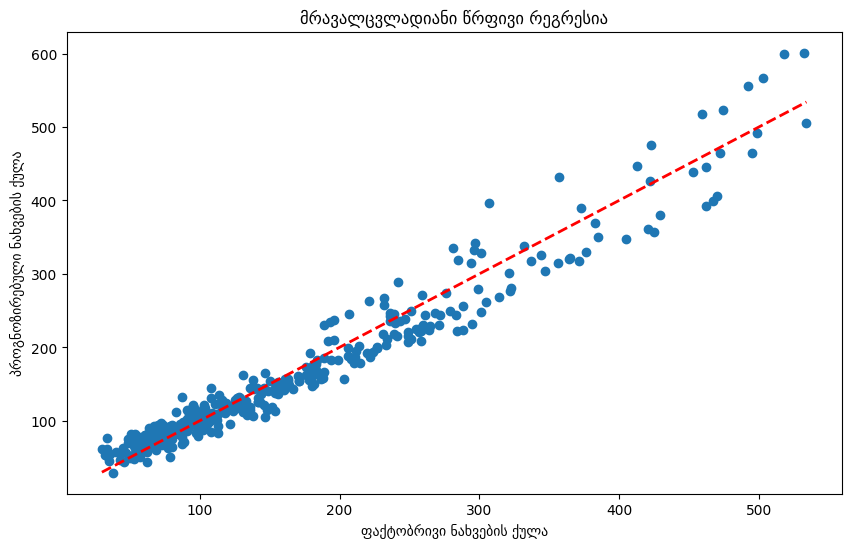

ახალი მონაცემის პროგნოზი: 74.87144062084846


In [31]:
X = data[['Days Since Release', 'Days In Top 10', 'Year to Date Rank']]
y = data['Viewership Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nმრავალცვლადიანი წრფივი რეგრესიის შედეგები:")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

# ვიზუალიზაცია
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('ფაქტობრივი ნახვების ქულა')
plt.ylabel('პროგნოზირებული ნახვების ქულა')
plt.title('მრავალცვლადიანი წრფივი რეგრესია')
plt.show()

# ახალი მონაცემის პროგნოზი
new_data = pd.DataFrame({'Days Since Release': [100], 'Days In Top 10': [10], 'Year to Date Rank': [5]})
new_prediction = model.predict(new_data)
print(f"ახალი მონაცემის პროგნოზი: {new_prediction[0]}")

# 3. გადაწყვეტილების ხის რეგრესია


გადაწყვეტილების ხის რეგრესიის შედეგები:
MSE: 303.640306122449
R-squared: 0.9748973890221907


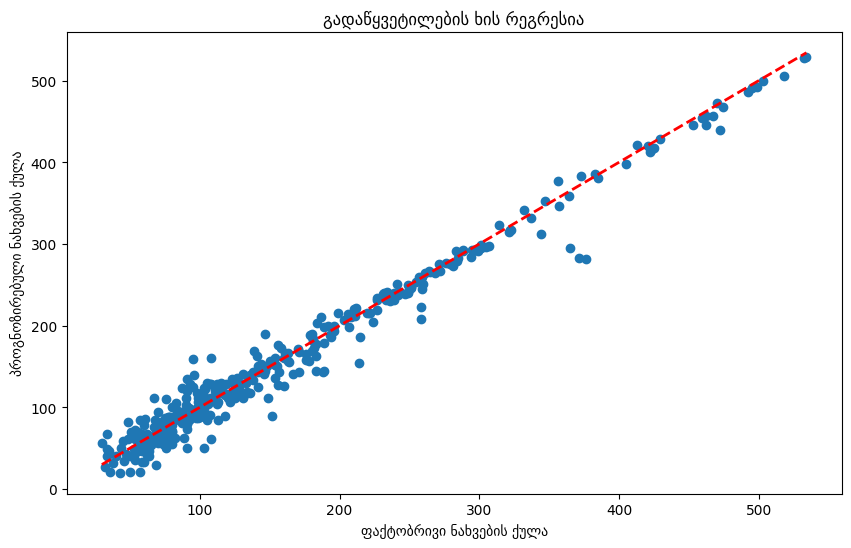

ახალი მონაცემის პროგნოზი: 57.0


In [32]:
X = data[['Days Since Release', 'Days In Top 10', 'Year to Date Rank']]
y = data['Viewership Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nგადაწყვეტილების ხის რეგრესიის შედეგები:")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

# ვიზუალიზაცია
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('ფაქტობრივი ნახვების ქულა')
plt.ylabel('პროგნოზირებული ნახვების ქულა')
plt.title('გადაწყვეტილების ხის რეგრესია')
plt.show()

# ახალი მონაცემის პროგნოზი
new_data = pd.DataFrame({'Days Since Release': [100], 'Days In Top 10': [10], 'Year to Date Rank': [5]})
new_prediction = model.predict(new_data)
print(f"ახალი მონაცემის პროგნოზი: {new_prediction[0]}")

# 4. ლოგისტიკური რეგრესია


ლოგისტიკური რეგრესიის შედეგები:
სიზუსტე: 0.9473684210526315


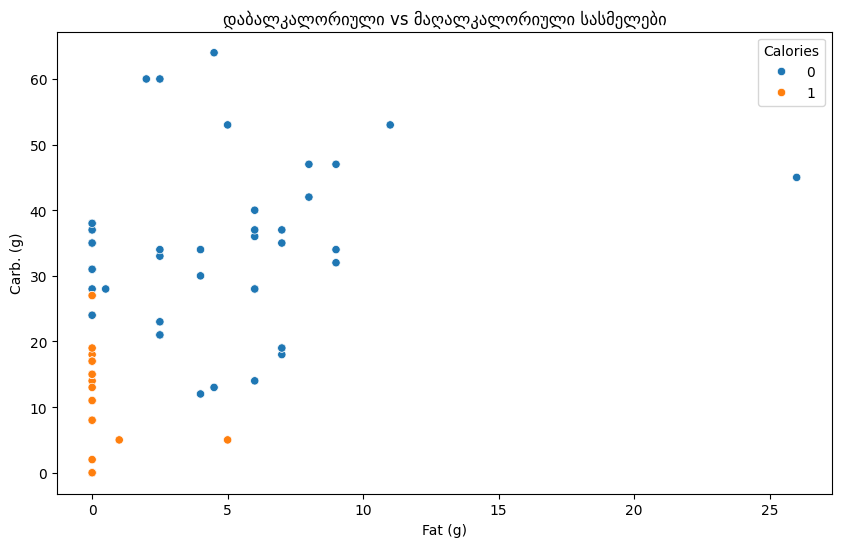

ახალი მონაცემის პროგნოზი (1 - დაბალკალორიული, 0 - მაღალკალორიული): 0


In [35]:
# აბალი დატასეტის შემოტანა
data = pd.read_csv('starbucks-menu-nutrition-drinks.csv')

# მონაცემების გასუფთავება
data = data.replace('-', np.nan).dropna()
data = data.apply(pd.to_numeric, errors='ignore')

# ამ ნაწილში ვიყენებთ ლოგისტიკურ რეგრესიას, რათა ვიწინასწარმეტყველოთ
# არის თუ არა სასმელი დაბალკალორიული (100 კალორიაზე ნაკლები)


X = data[['Fat (g)', 'Carb. (g)']]
y = (data['Calories'] < 100).astype(int)

# შევამოწმოთ, რომ გვაქვს ორივე კლასი
if len(y.unique()) < 2:
    print("მონაცემებში მხოლოდ ერთი კლასია. ლოგისტიკური რეგრესია ვერ შესრულდება.")
else:
    # მონაცემების დაყოფა
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # მოდელის შექმნა და სწავლება
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # პროგნოზის გაკეთება
    y_pred = model.predict(X_test)

    # სიზუსტის გამოთვლა
    accuracy = accuracy_score(y_test, y_pred)

    print("\nლოგისტიკური რეგრესიის შედეგები:")
    print(f"სიზუსტე: {accuracy}")

    # ვიზუალიზაცია
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Fat (g)', y='Carb. (g)', hue=y, data=data)
    plt.title('დაბალკალორიული vs მაღალკალორიული სასმელები')
    plt.show()

    # ახალი მონაცემის პროგნოზი
    new_data = pd.DataFrame({'Fat (g)': [5], 'Carb. (g)': [20]})
    new_prediction = model.predict(new_data)
    print(f"ახალი მონაცემის პროგნოზი (1 - დაბალკალორიული, 0 - მაღალკალორიული): {new_prediction[0]}")

# 5. გადაწყვეტილების ხის კლასიფიკაცია


Decision Tree Classification Results:
Accuracy: 0.8947368421052632


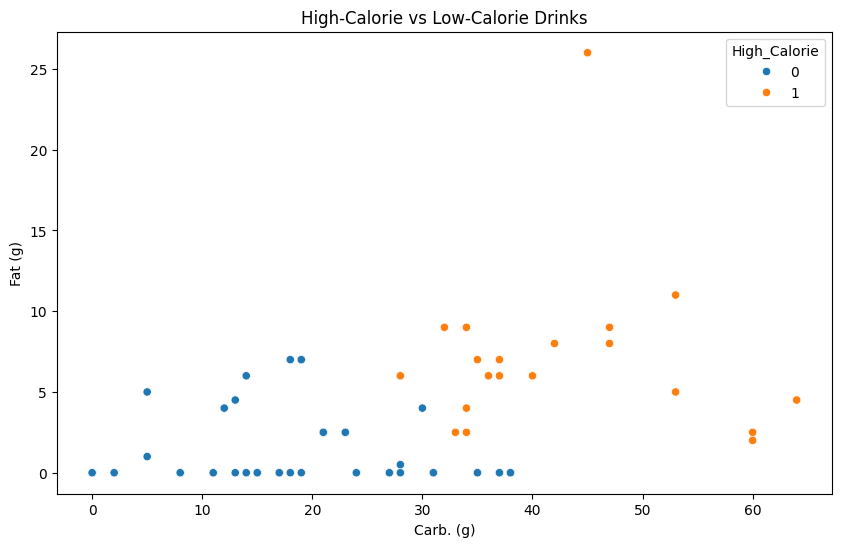


New drink prediction: Low-Calorie


In [36]:
# სვეტების რიცხვით ტიპად გარდაქმნა
numeric_columns = ['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein', 'Sodium']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data['High_Calorie'] = (data['Calories'] >= 200).astype(int)

X = data[['Fat (g)', 'Carb. (g)', 'Protein', 'Sodium']]
y = data['High_Calorie']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("\nDecision Tree Classification Results:")
print(f"Accuracy: {accuracy}")

# ვიზუალიზაცია
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Carb. (g)', y='Fat (g)', hue='High_Calorie', data=data)
plt.title('High-Calorie vs Low-Calorie Drinks')
plt.show()

# ახალი სასმელის პროგნოზი
new_drink = pd.DataFrame({
    'Fat (g)': [5],
    'Carb. (g)': [30],
    'Protein': [2],
    'Sodium': [100]
})
new_prediction = model.predict(new_drink)
print(f"\nNew drink prediction: {'High-Calorie' if new_prediction[0] == 1 else 'Low-Calorie'}")